In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

C:\Users\vasanthan.vasudevan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
mnist = keras.datasets.mnist

In [3]:
(X_train,Y_train),(X_test, Y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
type(X_train)

numpy.ndarray

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [7]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
X_train /= 255
X_test /= 255

In [10]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


### Model Design

In [11]:
model1 = Sequential()
model1.add(Dense(10, input_shape = (784, ), name = 'Dense_1', activation='softmax'))
model1.add(Dense(50, name='Dense_2', activation='relu'))
model1.add(Dense(50, name='Dense_3', activation='relu'))
model1.add(Dense(50, name='Dense_4', activation='relu'))
model1.add(Dense(10, name='output_layer', activation='softmax'))

C:\Users\vasanthan.vasudevan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Training

In [13]:
trained = model1.fit(X_train, Y_train, batch_size=100, epochs= 20 , validation_split=0.2)

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7176 - loss: 0.8726 - val_accuracy: 0.8752 - val_loss: 0.4246
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8888 - loss: 0.3800 - val_accuracy: 0.9066 - val_loss: 0.3255
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9105 - loss: 0.3079 - val_accuracy: 0.9192 - val_loss: 0.2823
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9201 - loss: 0.2777 - val_accuracy: 0.9146 - val_loss: 0.2970
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9245 - loss: 0.2598 - val_accuracy: 0.9254 - val_loss: 0.2602
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9275 - loss: 0.2485 - val_accuracy: 0.9282 - val_loss: 0.2499
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9307 - loss: 0.2350 - val_accuracy: 0.9282 - val_loss: 0.2470
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9328 - loss: 0.2289 - val_accuracy: 0.

In [14]:
trained.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [15]:
import matplotlib.pyplot as plt
import random

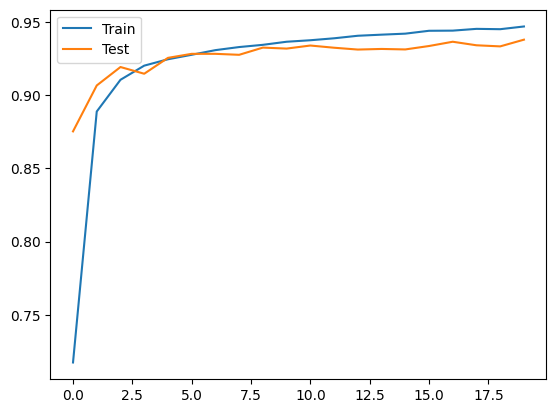

In [16]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.legend(['Train','Test'])
plt.show()

In [17]:
import numpy as np

No. generated is : 1445
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


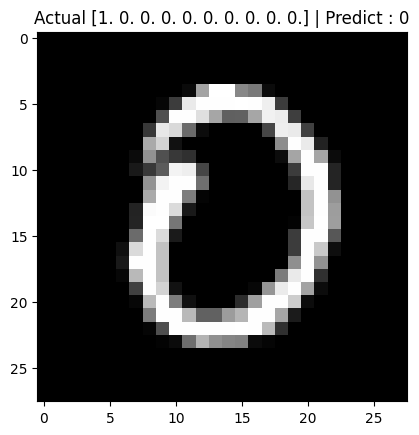

In [18]:
num = random.randint(0,X_test.shape[0] -1)
print(f'No. generated is : {num}')
img = X_test[num].reshape(1, 784)
pred = model1.predict(img)

pred = np.argmax(pred)
plt.imshow(img.reshape(28,28), cmap='grey')
plt.title(f'Actual {Y_test[num]} | Predict : {pred}')

plt.show()

## Model enhancement

##### Drop out layer


In [19]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers, regularizers

In [20]:
model2 = Sequential()
model2.add(Dense(10, input_shape = (784, ), name = 'Dense_1', activation='softmax'))
model2.add(layers.BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(50, name='Dense_2', activation='relu'))

model2.add(Dense(50, name='Dense_3', activation='relu'))


model2.add(Dense(50, name='Dense_4', activation='relu'))


model2.add(Dense(10, name='output_layer', activation='softmax'))

In [21]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model2.fit(X_train, Y_train, batch_size=100, validation_split=0.2, epochs=20)

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7599 - loss: 0.7521 - val_accuracy: 0.8966 - val_loss: 0.3721
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8559 - loss: 0.4555 - val_accuracy: 0.9147 - val_loss: 0.2808
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8714 - loss: 0.4086 - val_accuracy: 0.9254 - val_loss: 0.2530
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8784 - loss: 0.3874 - val_accuracy: 0.9273 - val_loss: 0.2438
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8826 - loss: 0.3754 - val_accuracy: 0.9300 - val_loss: 0.2360
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8874 - loss: 0.3585 - val_accuracy: 0.9319 - val_loss: 0.2225
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8889 - loss: 0.3520 - val_accuracy: 0.9349 - val_loss: 0.2223
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8905 - loss: 0.3445 - val_accuracy: 0.

## Check point with

In [23]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import callbacks

In [30]:
lr_schedular = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3 , verbose=1)


early_stop = callbacks.EarlyStopping(patience=3, restore_best_weights=True)


check_point = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

In [31]:
model3 = Sequential()

model3.add(Dense(10, input_shape = (784, ), name = 'Dense_1', activation='softmax'))
model3.add(layers.BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Dense(50, name='Dense_2', activation='relu'))

model3.add(Dense(50, name='Dense_3', activation='relu'))


model3.add(Dense(50, name='Dense_4', activation='relu'))


model3.add(Dense(10, name='output_layer', activation='softmax'))




In [32]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model3.fit(X_train,Y_train, batch_size=100, validation_split=0.2, epochs=20, callbacks=[early_stop,check_point,lr_schedular])

Epoch 1/20
471/480 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6206 - loss: 1.1510
Epoch 1: val_accuracy improved from None to 0.90108, saving model to best_model.keras

Epoch 1: finished saving model to best_model.keras
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7517 - loss: 0.7654 - val_accuracy: 0.9011 - val_loss: 0.3643 - learning_rate: 0.0010
Epoch 2/20
473/480 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8489 - loss: 0.4769
Epoch 2: val_accuracy improved from 0.90108 to 0.91233, saving model to best_model.keras

Epoch 2: finished saving model to best_model.keras
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8529 - loss: 0.4652 - val_accuracy: 0.9123 - val_loss: 0.2970 - learning_rate: 0.0010
Epoch 3/20
467/480 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8614 - loss: 0.4376
Epoch 3: val_accuracy did not improve from 0.91233
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8641 - loss: 0.4313 - val_accuracy: 0.9122 - val_loss: 0.2860 - learning_ra

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


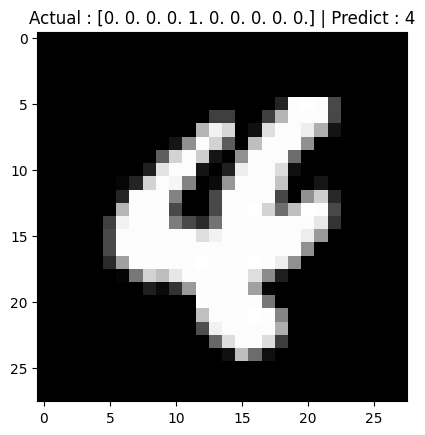

In [48]:
num = 95
plt.imshow(X_test[num].reshape(28,28), cmap='grey')

pred = model3.predict(X_test[num].reshape(1,784))
res = np.argmax(pred)
plt.title(f'Actual : {Y_test[num]} | Predict : {res}')
plt.show()